<a href="https://colab.research.google.com/github/Haard-Shah/K-EmoConEmotionRecognition/blob/main/Copy_of_K_EmoCon_Mini_project_Emotion_Recognition_using_Deep_Learning_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS565 IoT Data Science Assignment
*This material is a joint work of TAs from IC Lab at KAIST, including Woohyeok  Choi, Soowon Kang, Auk Kim, Inyeob Kim, Minhyung Kim, Hansoo Lee, Cheul Y. Park, and Eunji Park. This work is licensed under CC BY-SA 4.0.*


## Instruction
In this mini-project, we will build a model to predict a user's emotion using [K-EmoCon dataset](https://drive.google.com/file/d/17o8eDKqo4REha9Rsr3F6Q6xIjdd8Z86E/view?usp=sharing). The K-EmoCon dataset contains a collection of physiological sensors, video, and audio data corresponding to the emotion (e.g., valence, arousal, anger, etc.). Two participants debated social issues during data collection. After the debate, each participant rated their emotions and their partner's emotions on a 5-point Likert scale. In addition, five external evaluators estimated participants' emotions.

In this lab, we will develop a deep neural network model that predicts a level of arousal rated by external evaluators. We will use three physiological signals: heart rate, electrodermal activity, and body temperature. We note that the provided dataset does not contain video because the size of video data is enormous (about 9 GB).

The assignment consists of two parts: (1) basic DNN model building/evaluating (80pt) and (2) performance optimization (20pt). Please make sure that your code should be executable so that the TAs can reproduce your results.



# 1. Preparation

## 1.1. Install Dependencies

In [ ]:
!pip3 install -U pandas==2.0.3 numpy scipy scikit-learn plotly ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.0 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Un

## 1.2. Fix the Random Seed

In [ ]:
import tensorflow as tf


tf.random.set_seed(42)

## 1.3. Mount to Your Google Drive


In [ ]:
from google.colab import drive


drive.mount('/content/drive')

Mounted at /content/drive


## 1.4. Load K-EmoCon Dataset
Plase make sure that you download [the K-EmoCon dataset](https://drive.google.com/file/d/17o8eDKqo4REha9Rsr3F6Q6xIjdd8Z86E/view?usp=sharing) and store it to your Google drive.


In [ ]:
import pickle
import numpy as np


'''Please specify your dataset path in your Google Drive'''
PATH = '/content/drive/My Drive/IoT_Data_Science/KEmoCon/K-EmoCon.CS592.pkl'


DATASET = pickle.load(open(PATH, mode='rb'))

X = DATASET['X']
y = DATASET['y']
pids = DATASET['pids']
baseline = DATASET['baseline']
label_desc = DATASET['labels']
data_types = DATASET['data_types']

print(f'# The Number of Data: {len(X)}')
print(f'# Label Shape: {y.shape}')
print(f'# PIDs: {np.unique(pids)}')
print(f'# Data Types: {data_types}')
print(f'# Label Columns: {label_desc}')
print(f'# Example of Data: \r\n{X[0:2]}')
print(f'# Example of Baseline Measure: \r\n{baseline}')

# The Number of Data: 1919
# Label Shape: (1919, 21)
# PIDs: [ 4  5  8  9 10 13 15 19 21 22 23 25 26 29 30 31]
# Data Types: ['brain.alpha.high' 'brain.alpha.low' 'brain.attention' 'brain.beta.high'
 'brain.beta.low' 'brain.delta' 'brain.gamma.low' 'brain.gamma.mid'
 'brain.meditation' 'brain.theta' 'e4.acc.x' 'e4.acc.y' 'e4.acc.z'
 'e4.bvp' 'e4.eda' 'e4.hr' 'e4.temp' 'rec.audio.left' 'rec.audio.right'
 'rec.video']
# Label Columns: ['self.arousal' 'self.valence' 'self.cheerful' 'self.happy' 'self.angry'
 'self.nervous' 'self.sad' 'partner.arousal' 'partner.valence'
 'partner.cheerful' 'partner.happy' 'partner.angry' 'partner.nervous'
 'partner.sad' 'external.arousal' 'external.valence' 'external.cheerful'
 'external.happy' 'external.angry' 'external.nervous' 'external.sad']
# Example of Data: 
[{'e4.acc.x': array([-55., -54., -56., -56., -56., -56., -57., -57., -55., -55., -57.,
       -56., -55., -56., -56., -56., -57., -55., -56., -57., -57., -56.,
       -56., -56., -56., -57., -57

In [ ]:
DATASET['y'].shape

(1919, 21)

## 1.5. Exploring Data
Please do not select *rec.audio.left* and *rec.audio.right* that contain a large number of samples (e.g., 8000Hz). Therefore, plotting such data would stop your Colab session. The table below is a brief description of the data.


|Data Name|Description|
|---|---|
|brain.alpha.high|High alpha brain waves from NeuroSky MindWave Headset|
|brain.alpha.low|Low alpha brain waves from NeuroSky MindWave Headset|
|brain.beta.high|High beta brain waves from NeuroSky MindWave Headset|
|brain.beta.low|Low beta brain waves from NeuroSky MindWave Headset|
|brain.delta|Delta brain waves from NeuroSky MindWave Headset|
|brain.gamma.low|Low gamma brain waves from NeuroSky MindWave Headset|
|brain.gamma.mid|Middle gamma brain waves from NeuroSky MindWave Headset|
|brain.theta|Theta brain waves from NeuroSky MindWave Headset
|brain.meditation|A meditation level from NeuroSky MindWave Headset|
|brain.attention|A attention level from NeuroSky MindWave Headset|
|e4.acc.x|X-axial acceleration values from Empathica E4|
|e4.acc.y|Y-axial acceleration values from Empathica E4|
|e4.acc.z|X-axial acceleration values from Empathica E4|
|e4.bvp|Blood volume pulse from Empathica E4|
|e4.eda|Electrodermal activity from Empathica E4|
|e4.hr|Heartrate from Empathica E4|
|e4.temp|Body temperature from Empathica E4|
|rec.audio.left|Left-channel audio-recording of the debate (8000 Hz)|
|rec.audio.right|Right-channel audio-recording of the debate (8000 Hz)|

### 1.5.1. Data Distribution across Class Labels


In [ ]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ipywidgets import interact


def vis_sensor_all(dtype: str, label: str):
    _X, _y = [], []
    M = label_desc == label

    for xx, yy, pp in zip(X, y, pids):
        if dtype in xx:
            _xx = xx[dtype]
            _X.append(_xx)
            _y.append(np.repeat(yy[M][0], len(_xx)))

    _X = np.concatenate(_X, axis=0)
    _y = np.concatenate(_y, axis=0)

    fig = go.Figure(
        go.Box(x=_y, y=_X)
    )

    return fig.update_layout(
        width=800, height=400
    )

interact(
    vis_sensor_all,
    dtype=data_types,
    label=label_desc
)

interactive(children=(Dropdown(description='dtype', options=('brain.alpha.high', 'brain.alpha.low', 'brain.att…

<function __main__.vis_sensor_all(dtype: str, label: str)>

### 1.5.2. Data Distribution for Each Participant

In [ ]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ipywidgets import interact


def vis_sensor(dtype: str, label: str, pid: int):
    _X, _y = [], []
    M = label_desc == label

    for xx, yy, pp in zip(X, y, pids):
        if pp == pid and dtype in xx:
            _xx = xx[dtype]
            _X.append(_xx)
            _y.append(np.repeat(yy[M][0], len(_xx)))

    _X = np.concatenate(_X, axis=0)
    _y = np.concatenate(_y, axis=0)
    _t = np.arange(len(_X))

    fig = make_subplots(
        rows=2, cols=1,
        row_titles=['Boxplots', 'Timeseries']
    )

    fig.add_trace(
        go.Box(x=_y, y=_X, name=dtype), row=1, col=1
    )

    for i in np.unique(_y):
        M = _y == i
        xx = _X[M]
        yy = _y[M]
        tt = _t[M]

        fig.add_trace(
            go.Scatter(
                x=tt,
                y=xx,
                name=str(i),
                mode='markers',
                marker=dict(size=2)
            ), row=2, col=1
        )

    return fig.update_layout(
        width=800, height=400
    )

interact(
    vis_sensor,
    dtype=data_types,
    label=label_desc,
    pid=np.unique(pids)
)

interactive(children=(Dropdown(description='dtype', options=('brain.alpha.high', 'brain.alpha.low', 'brain.att…

<function __main__.vis_sensor(dtype: str, label: str, pid: int)>

## 1.6. Choosing a Class Label: A Level of Arousal Rated by External Evaluators
In this dataset, we have multiple class labels (e.g., *self.arousal*, *partner.arousal*, etc.). In this mini-project, we will only use *external.arousal* which indicates an arousal level rated by the 3rd parties. Please refer to the dataset paper for details about different types of ratings.

In [ ]:
import numpy as np

'''
"numpy.ravel()" transforms [[1], [2], [3], ...] to [1, 2, 3, ...]
'''
y_ea = np.ravel(
    y[:, label_desc == 'external.arousal']
)
print("Shape of the label data: ", y_ea.shape)

Shape of the label data:  (1919,)


# 2. Preprocessing (25pt)

## 2.1. (Problem 1) Label Transformation: 5-Point Likert Scale to Binary Label (10pt)
Instead of predicting a 5-point Likert scale, we will change this problem into a binary classification for convenience.

### 2.1.1. (Problem 1.1; 5pt) Simple Binarization by Dividing Labels into Two Sides
First, we simply change multiple class labels into binary labels by considering *1, 2* as *low arousal level (0)* and *3, 4, 5* as *high arousal level (1)*

In [ ]:
import numpy as np

################# Problem 1.1 #################
'''
Args
    x (np.ndarray) : 1-D numpy array of a 5-point Likert scale
Return
    np.ndarray : binary 1-D array contains either 0 or 1.
'''
def binarize_low_high(x: np.ndarray) -> np.ndarray:

    # Write your code here


###############################################

If your implementation is correct, the codes below will print a label distribution for each participant.

In [ ]:
import numpy as np


y_simple = binarize_low_high(x=y_ea)

for pid in np.unique(pids):
    M = pids == pid
    print(f'PID = {pid}: {np.unique(y_simple[M], return_counts=True)}')

PID = 4: (array([0, 1]), array([56, 64]))
PID = 5: (array([0, 1]), array([ 10, 110]))
PID = 8: (array([0, 1]), array([86, 34]))
PID = 9: (array([0, 1]), array([94, 26]))
PID = 10: (array([0, 1]), array([85, 35]))
PID = 13: (array([0, 1]), array([70, 50]))
PID = 15: (array([0, 1]), array([46, 74]))
PID = 19: (array([0, 1]), array([  8, 112]))
PID = 21: (array([0, 1]), array([93, 26]))
PID = 22: (array([0, 1]), array([102,  18]))
PID = 23: (array([0, 1]), array([76, 44]))
PID = 25: (array([0, 1]), array([  1, 119]))
PID = 26: (array([0, 1]), array([  3, 117]))
PID = 29: (array([0, 1]), array([40, 80]))
PID = 30: (array([0, 1]), array([ 20, 100]))
PID = 31: (array([1]), array([120]))


### 2.1.2. (Problem 1.2; 5pt) Dynamic Binarization by Considering Users' Characteristics
Participants could have a bias when they evaluate their emotions.
For example, a particular participant could rate their arousal within 1 to 3 (i.e., the lowest to the medium level). In contrast, another participant could do their arousal within 4 to 5 (i.e., the high to the highest level). In this case, you can transform class labels considering each participant's average level of arousal.

For each participant:
1. Calculate the average level of arousal.
2. Transform class labels exceeding the average into the high arousal (i.e., 1); otherwise, the low arousal (i.e., 0).

In [ ]:
import numpy as np


################# Problem 1.2 #################
'''
    Args
        x (np.ndarray) : 1-D numpy array of a 5-point Likert scale
        groups (np.ndarray) : 1-D numpy array indicating participant's IDs.
    Return
        np.ndarray : binary 1-D array contains either 0 or 1.
'''
def binarize_mean(x: np.ndarray, groups: np.ndarray) -> np.ndarray:

    # Write your code here


###############################################


If your implementation is correct, the codes below will print a label distribution for each participant.

In [ ]:
import numpy as np


y_dynamic = binarize_mean(x=y_ea, groups=pids)

for pid in np.unique(pids):
    M = pids == pid
    print(f'PID = {pid}: {np.unique(y_dynamic[M], return_counts=True)}')

PID = 4: (array([0, 1]), array([56, 64]))
PID = 5: (array([0, 1]), array([ 10, 110]))
PID = 8: (array([0, 1]), array([86, 34]))
PID = 9: (array([0, 1]), array([94, 26]))
PID = 10: (array([0, 1]), array([85, 35]))
PID = 13: (array([0, 1]), array([70, 50]))
PID = 15: (array([0, 1]), array([46, 74]))
PID = 19: (array([0, 1]), array([84, 36]))
PID = 21: (array([0, 1]), array([37, 82]))
PID = 22: (array([0, 1]), array([37, 83]))
PID = 23: (array([0, 1]), array([76, 44]))
PID = 25: (array([0, 1]), array([94, 26]))
PID = 26: (array([0, 1]), array([73, 47]))
PID = 29: (array([0, 1]), array([40, 80]))
PID = 30: (array([0, 1]), array([88, 32]))
PID = 31: (array([0, 1]), array([92, 28]))


## 2.2. (Problem 2; 15pt) Resampling

Each sensor signal has different sampling rates. Heterogenous sampling rates may result in providing different weights to different data streams. Too low sampling rates make it hard to build a robust model (because one stream may dominate the other streams). On the other hand, too high sampling rates cause too much time for learning. Thus, it is important to properly tune sampling rates, as long as we don't lose too much information.

The *scipy* provides some functions for resampling. In this problem, we will use the *interp1d function* in *the scipy.interpolate package*, which can create a function based on fixed data points and evaluate anywhere within a given domain using linear interpolation.

An instance of this function is created by passing the 1-D vectors comprising the data. After creating the instance, we can treat it like a function to generate interpolated samples. For the detailed information, please refer to [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html).

In [ ]:
import numpy as np
import scipy.interpolate as intp


################# Problem 2 #################
'''
Args
    x (numpy.ndarray): 1-D array
    target_N (int): the target number of samples
Return
    resampled data (numpy.ndarray): 1-D resampled data

You should set the parameter of interp1d as below:
kind='linear'
'''
def resampling(x: np.ndarray, target_N: int) -> np.ndarray:



###############################################

If you do it correctly, the codes below will show (1) the initial heart rate signal, (2) upsampled signal by four times, and (3) downsampled signal by half.

In [ ]:
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go


HR = np.concatenate([x['e4.hr'] for x in X[:2]], axis=0)
n = len(HR)

fig = make_subplots(
    rows=3, cols=1, shared_xaxes=True, shared_yaxes=True,
    x_title='Timesteps', y_title='Heartrate (BPM)'
)

fig.add_trace(
    go.Scatter(
        x=np.linspace(0, n, num=n),
        y=HR,
        mode='markers+lines',
        name='Original Signal'
    ),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(
        x=np.linspace(0, n, num=n * 4),
        y=resampling(HR, n * 4),
        mode='markers+lines',
        name='Upsampling by 4 Times'
    ),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(
        x=np.linspace(0, n, num=n // 2),
        y=resampling(HR, n // 2),
        mode='markers+lines',
        name='Downsampled by Half'
    ),
    row=3, col=1
)
fig.update_layout(
    width=800, height=400
)

If you correctly implement *resampling*, it is time to resample the K-EmoCon dataset. In this assignment, we will use three signals: heart rate (*e4.hr*), electrodermal activity (*e4.eda*), and body temperature (*e4.temp*) collected from Empathica E4 devices.

The heart rate signal was collected every second (i.e., 1Hz); on the other hand, for the other two signals, four recordings were collected every second (i.e., 4Hz). Therefore, for synchronizing heterogeneous sampling rates, we will resample each signal as 4Hz. In other words, each class label will have 20 samples. We expect each sample's shape will be (20, 3).

In [ ]:
import numpy as np


X_res = []

for x, pid in zip(X, pids):
    row = []

    for dtype in ['e4.hr', 'e4.eda', 'e4.temp']:
        sig = resampling(x = x[dtype], target_N=20)
        row.append(sig)
    X_res.append(np.column_stack(row))

X_res = np.asarray(X_res)
print(f"Shape of signal: {X_res.shape}")
print(f"Shape of simple binarized label: {y_simple.shape}")

Shape of signal: (1919, 20, 3)
Shape of simple binarized label: (1919,)


#  3. DNN Model Building (25pt)

We will build the simple DNN model that contains four dense layers as below:


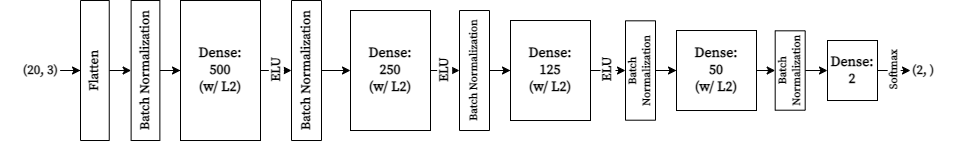

* Use a weight intialization for layers that use ELU activation function
* Apply L2 regualarization to  every dense layers except for the last layer

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers


################# Problem 3 #################
'''
Args
    None
Return
    model (tensorflow.keras.Model): DNN model
'''

def build_dnn() -> keras.Model:
    # Write your code here



###############################################

# 4. Training & Evaluation (30pt)

For cross-validation, we will use *the simply-binarized label*. The baseline accuracy is as below:


In [ ]:
_, cnt = np.unique(y_simple, return_counts = True)
cnt[1] / np.sum(cnt)

0.5883272537780094

## 4.1. Data Split
For evaluating our model, we will use *group K-fold*, in which the same participant will not appear in two different folds. For this, you may consider *scikit-learn's sklearn.model_selection.GroupKFold*. However, in this assignment, we prepare predefined folds in which each fold's label distributions of training and testing set are roughly the same.


In [ ]:
import numpy as np

GROUP_K_FOLD = [[4,5,8,9], [10,13,15,25], [19,21,23,30], [22,26,29,31]]

I_TRAINS, I_TESTS = [], []

for g in GROUP_K_FOLD:
    M_test = np.isin(pids, g)
    M_train = ~M_test

    I_test = np.flatnonzero(M_test)
    I_train = np.flatnonzero(M_train)

    I_TRAINS.append(I_train)
    I_TESTS.append(I_test)

## 4.2. (Problem 4; 15pt) Training
Please train your model using the following parameters:
* Loss Function: Sparse Categorical Cross Entropy (use the right implementation for our data)
* Additional Metric: Accuracy (use the right implementation for our data)
* Optimizer: Adam
* Epoch: 100
* Batch Size: 32

In [ ]:
from tensorflow import keras
from tensorflow.keras.losses import SparseCategoricalCrossentropy



DNNS = []

for I_train in I_TRAINS:
    X_train, y_train = X_res[I_train], y_simple[I_train]

    ################## Problem 4.2 #################

    ###############################################

    DNNS.append(model)



Epoch 1/100
45/45 [==============================] - 3s 11ms/step - loss: 6.6697 - accuracy: 0.7241
Epoch 2/100
45/45 [==============================] - 0s 9ms/step - loss: 4.8045 - accuracy: 0.7561
Epoch 3/100
45/45 [==============================] - 0s 8ms/step - loss: 3.3826 - accuracy: 0.7582
Epoch 4/100
45/45 [==============================] - 0s 8ms/step - loss: 2.4575 - accuracy: 0.7519
Epoch 5/100
45/45 [==============================] - 0s 8ms/step - loss: 1.8485 - accuracy: 0.7512
Epoch 6/100
45/45 [==============================] - 0s 8ms/step - loss: 1.4345 - accuracy: 0.7394
Epoch 7/100
45/45 [==============================] - 0s 8ms/step - loss: 1.1652 - accuracy: 0.7526
Epoch 8/100
45/45 [==============================] - 0s 8ms/step - loss: 1.0096 - accuracy: 0.7387
Epoch 9/100
45/45 [==============================] - 0s 7ms/step - loss: 0.8831 - accuracy: 0.7394
Epoch 10/100
45/45 [==============================] - 0s 8ms/step - loss: 0.7927 - accuracy: 0.7575
Epoch 11

## 4-3. (Problem 5; 15pt) Testing
* Calculate and print logistic losses and accuracies for each fold.
* Calculate and print mean and standard deviation of performace measures.



In [ ]:
import numpy as np


for model, I_test in zip(DNNS, I_TESTS):
    X_test, y_test = X_res[I_test], y_simple[I_test]

    ################## Problem 4.3 #################

    # Write your code here


    ###############################################

# Extract loss and accuracy from results
losses = [result[0] for result in evaluation_results]
accuracies = [result[1] for result in evaluation_results]

# Calculate mean and standard deviation for loss and accuracy
mean_loss = np.mean(losses)
std_dev_loss = np.std(losses)
mean_accuracy = np.mean(accuracies)
std_dev_accuracy = np.std(accuracies)

print(f"Mean Accuracy: {mean_accuracy * 100:.2f}%, (SD={std_dev_accuracy})")
print(f"Mean Loss: {mean_loss:.4f}, (SD={std_dev_loss})")

Mean Accuracy: 65.19%, (SD=0.09932887223196545)
Mean Loss: 0.7983, (SD=0.3066392754238508)


We can see that this model is better than the baseline.

# 5. (Bonus) Performance Optimization (20pt)

Now, you have an opportunity to build your own model, which shows *higher accuracy* than the model we built in the lab. We will give extra points in the order of *high accuracy*. Before building, you need to know what is possible and impossible.

* You can:
    * Resample/interpolate/impute data
    * Use data types (e.g., audio, accelerometer)
    * Change a neural network structure
    * Tune hyperparameter
* You must not:
    * Change a class label: You must use a simply-binarized external arousal label.
    * Change a fold's structure: You must use our predefined folds.
    * Change a random seed: You must use 42 (the answer of the everything)

Please write your code in the single-cell below. Ensure that your code is executable, and you should print *the mean accuracy* at the end of the result.

